<a href="https://colab.research.google.com/github/AnHaiTrinh/handson-ml/blob/main/Intro2ANN%26Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import time, os

import sklearn

import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
keras.__version__

'2.8.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

(-0.5, 27.5, 27.5, -0.5)

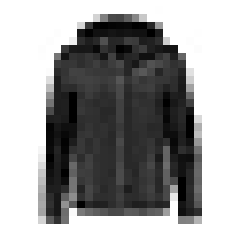

In [ ]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

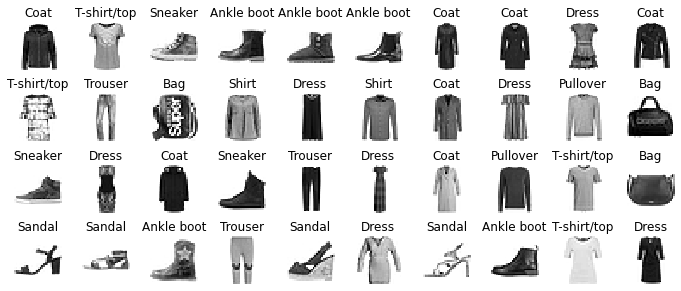

In [ ]:
n_rows, n_cols = 4, 10
plt.figure(figsize=(1.2 * n_cols, 1.2 * n_rows))
for row in range(n_rows):
  for col in range(n_cols):
    index = row * n_cols + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
same_model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[28, 28]),
      keras.layers.Dense(300, activation='relu'),
      keras.layers.Dense(100, activation='relu'),
      keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer("dense_1")

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[-0.00594406,  0.03915787,  0.05579332, ..., -0.04438492,
         0.02993018,  0.03849432],
       [-0.07240507,  0.04916351,  0.06924124, ..., -0.06627952,
        -0.02993573, -0.06591389],
       [ 0.0736828 , -0.06940395,  0.06334563, ...,  0.02108832,
         0.04314506,  0.0318499 ],
       ...,
       [-0.00893064,  0.01938095, -0.0039581 , ...,  0.06600317,
         0.03069253,  0.04509708],
       [-0.05723512,  0.02572691, -0.02723774, ..., -0.02157633,
         0.01630662, -0.04898264],
       [ 0.02076641, -0.04166638, -0.03298164, ...,  0.01233063,
         0.00593796, -0.07038804]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 17s 8ms/step - loss: 0.7041 - accuracy: 0.7658 - val_loss: 0.5219 - val_accuracy: 0.8162
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4833 - accuracy: 0.8321 - val_loss: 0.4643 - val_accuracy: 0.8354
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4392 - accuracy: 0.8456 - val_loss: 0.4253 - val_accuracy: 0.8570
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4086 - accuracy: 0.8557 - val_loss: 0.3865 - val_accuracy: 0.8686
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3897 - accuracy: 0.8624 - val_loss: 0.3939 - val_accuracy: 0.8654
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3724 - accuracy: 0.8675 - val_loss: 0.3687 - val_accuracy: 0.8744
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3596 - accuracy: 0.8719 - val_loss: 0.3581 - val_accuracy

(0.0, 1.0)

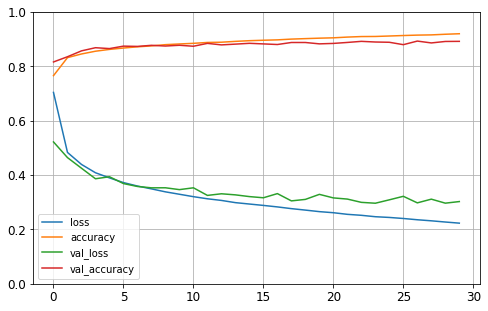

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3407 - accuracy: 0.8803


[0.3406727910041809, 0.880299985408783]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.06, 0.  , 0.91],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba, axis=1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
413/413 [==============================] - 2s 4ms/step - loss: 0.9837 - val_loss: 2.5975
Epoch 2/20
413/413 [==============================] - 2s 4ms/step - loss: 8.4630 - val_loss: 0.6025
Epoch 3/20
413/413 [==============================] - 2s 4ms/step - loss: 0.7125 - val_loss: 0.5142
Epoch 4/20
413/413 [==============================] - 2s 4ms/step - loss: 0.5617 - val_loss: 0.4592
Epoch 5/20
413/413 [==============================] - 2s 4ms/step - loss: 0.4953 - val_loss: 0.4339
Epoch 6/20
413/413 [==============================] - 2s 4ms/step - loss: 0.4728 - val_loss: 0.4210
Epoch 7/20
413/413 [==============================] - 2s 4ms/step - loss: 0.4528 - val_loss: 0.4149
Epoch 8/20
413/413 [==============================] - 2s 4ms/step - loss: 0.4377 - val_loss: 0.4099
Epoch 9/20
413/413 [==============================] - 2s 4ms/step - loss: 0.4273 - val_loss: 0.4025
Epoch 10/20
413/413 [==============================] - 2s 4ms/step - loss: 0.4240 - val_loss: 0.4001

(0.0, 1.0)

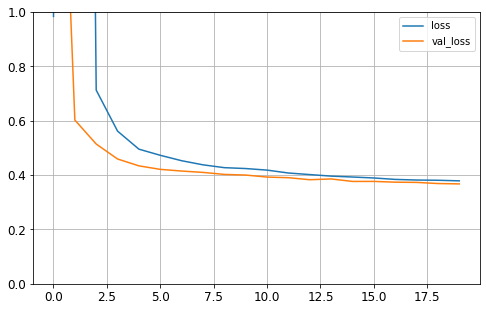

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [ ]:
mse_test = model.evaluate(X_test_scaled, y_test)

129/129 [==============================] - 0s 3ms/step - loss: 0.3921


In [ ]:
X_new = scaler.transform(X_test[:3])
y_pred = model.predict(X_new)
y_pred

array([[1.5358026],
       [3.7456808],
       [2.774004 ]], dtype=float32)

In [ ]:
y_test[:3]

array([1.139, 4.5  , 2.696])

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_9[0][0]']            

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=3e-3))
history = model.fit(X_train_scaled, y_train, epochs=40,
                    validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)

Epoch 1/40
413/413 [==============================] - 5s 9ms/step - loss: 1.1044 - val_loss: 0.6660
Epoch 2/40
413/413 [==============================] - 3s 7ms/step - loss: 0.6113 - val_loss: 0.5685
Epoch 3/40
413/413 [==============================] - 3s 7ms/step - loss: 0.6294 - val_loss: 0.5290
Epoch 4/40
413/413 [==============================] - 3s 7ms/step - loss: 0.5775 - val_loss: 0.4957
Epoch 5/40
413/413 [==============================] - 3s 7ms/step - loss: 0.5363 - val_loss: 0.4758
Epoch 6/40
413/413 [==============================] - 3s 7ms/step - loss: 0.4726 - val_loss: 0.4397
Epoch 7/40
413/413 [==============================] - 4s 9ms/step - loss: 0.4676 - val_loss: 0.4254
Epoch 8/40
413/413 [==============================] - 3s 8ms/step - loss: 0.4393 - val_loss: 0.4154
Epoch 9/40
413/413 [==============================] - 2s 5ms/step - loss: 0.4290 - val_loss: 0.4084
Epoch 10/40
413/413 [==============================] - 2s 4ms/step - loss: 0.4224 - val_loss: 0.4057

(0.2, 0.8)

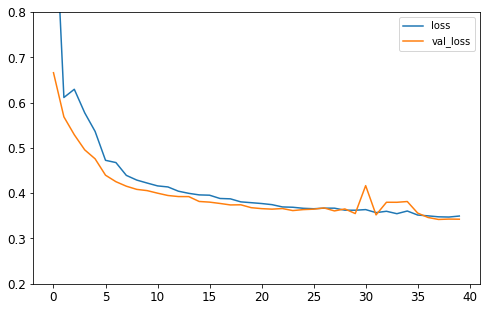

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0.2, 0.8)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_A, X_valid_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
403/413 [============================>.] - ETA: 0s - loss: 1.6864

KeyboardInterrupt: ignored

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 2)

In [ ]:
model.save("my_keras_model.h5")

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train_scaled, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
413/413 [==============================] - 2s 3ms/step - loss: 0.3481
Epoch 2/10
413/413 [==============================] - 1s 3ms/step - loss: 0.3419
Epoch 3/10
413/413 [==============================] - 1s 3ms/step - loss: 0.3425
Epoch 4/10
413/413 [==============================] - 1s 3ms/step - loss: 0.3447
Epoch 5/10
413/413 [==============================] - 1s 3ms/step - loss: 0.3385
Epoch 6/10
413/413 [==============================] - 1s 4ms/step - loss: 0.3446
Epoch 7/10
413/413 [==============================] - 1s 4ms/step - loss: 0.3466
Epoch 8/10
413/413 [==============================] - 2s 6ms/step - loss: 0.3422
Epoch 9/10
413/413 [==============================] - 3s 6ms/step - loss: 0.3475
Epoch 10/10
413/413 [==============================] - 2s 6ms/step - loss: 0.3428


Epoch 1/10
413/413 [==============================] - 2s 5ms/step - loss: 0.3569 - val_loss: 0.3428
Epoch 2/10
413/413 [==============================] - 2s 4ms/step - loss: 0.3424 - val_loss: 0.3543
Epoch 3/10
413/413 [==============================] - 2s 4ms/step - loss: 0.3601 - val_loss: 0.3494
Epoch 4/10
413/413 [==============================] - 2s 4ms/step - loss: 0.3681 - val_loss: 0.3400
Epoch 5/10
413/413 [==============================] - 2s 4ms/step - loss: 0.3426 - val_loss: 0.3396
Epoch 6/10
413/413 [==============================] - 2s 4ms/step - loss: 0.3405 - val_loss: 0.3504
Epoch 7/10
413/413 [==============================] - 2s 4ms/step - loss: 0.3462 - val_loss: 0.3364
Epoch 8/10
413/413 [==============================] - 2s 4ms/step - loss: 0.3373 - val_loss: 0.3435
Epoch 9/10
413/413 [==============================] - 2s 4ms/step - loss: 0.3436 - val_loss: 0.3368
Epoch 10/10
413/413 [==============================] - 2s 4ms/step - loss: 0.3353 - val_loss: 0.3379

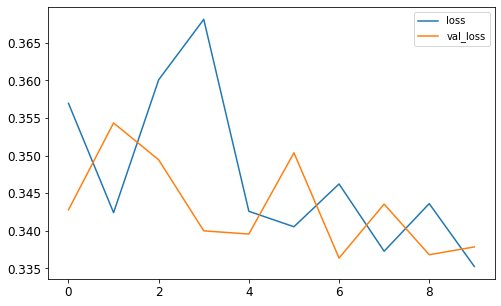

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train_scaled, y_train, epochs=10, 
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[checkpoint_cb])
pd.DataFrame(history.history).plot(figsize=(8, 5))

Epoch 1/100
413/413 [==============================] - 2s 4ms/step - loss: 0.3420 - val_loss: 0.3316
Epoch 2/100
413/413 [==============================] - 2s 4ms/step - loss: 0.3317 - val_loss: 0.3370
Epoch 3/100
413/413 [==============================] - 2s 4ms/step - loss: 0.3382 - val_loss: 0.3328
Epoch 4/100
413/413 [==============================] - 2s 4ms/step - loss: 0.3432 - val_loss: 0.3235
Epoch 5/100
413/413 [==============================] - 2s 4ms/step - loss: 0.3243 - val_loss: 0.3253
Epoch 6/100
413/413 [==============================] - 2s 4ms/step - loss: 0.3269 - val_loss: 0.3347
Epoch 7/100
413/413 [==============================] - 2s 4ms/step - loss: 0.3268 - val_loss: 0.3222
Epoch 8/100
413/413 [==============================] - 2s 4ms/step - loss: 0.3245 - val_loss: 0.3287
Epoch 9/100
413/413 [==============================] - 2s 4ms/step - loss: 0.3263 - val_loss: 0.3235
Epoch 10/100
413/413 [==============================] - 2s 4ms/step - loss: 0.3235 - val_lo

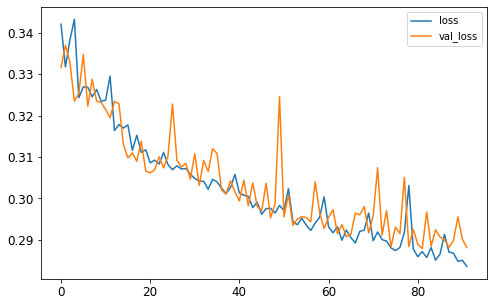

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=100,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [ ]:
class PrintVal2TrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"]/logs["loss"]))

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")

import time
def get_run_logdir():
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()


In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train_scaled, y_train, epochs=100,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[tensorboard_cb])

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train, X_valid = X_train_full[:50000] / 255.0, X_train_full[50000:] / 255.0
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]
X_test = X_test / 255.0

In [ ]:
my_model = keras.models.Sequential([
                                    keras.layers.Flatten(input_shape=[28, 28]),
                                    keras.layers.Dense(500, activation='relu'),
                                    keras.layers.Dense(300, activation='relu'),
                                    keras.layers.Dense(10, activation='softmax')
])
my_model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.03), metrics=["accuracy"])

In [ ]:
my_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 500)               392500    
                                                                 
 dense_49 (Dense)            (None, 300)               150300    
                                                                 
 dense_50 (Dense)            (None, 10)                3010      
                                                                 
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = my_model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3933 - accuracy: 0.8920 - val_loss: 0.2205 - val_accuracy: 0.9376
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1899 - accuracy: 0.9447 - val_loss: 0.1623 - val_accuracy: 0.9552
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1391 - accuracy: 0.9591 - val_loss: 0.1241 - val_accuracy: 0.9656
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1078 - accuracy: 0.9687 - val_loss: 0.1219 - val_accuracy: 0.9663
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0869 - accuracy: 0.9747 - val_loss: 0.0966 - val_accuracy: 0.9730
Epoch 6/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0714 - accuracy: 0.9794 - val_loss: 0.0937 - val_accuracy: 0.9733
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0592 - accuracy: 0.9834 - val_loss: 0.0878 - val_ac

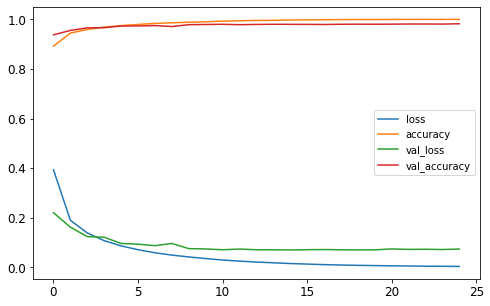

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [ ]:
my_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0653 - accuracy: 0.9803


[0.06525228172540665, 0.9803000092506409]